In [38]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # makes the notebook fill the whole window

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import datetime
import os
import re
import pandas as pd
import shutil

from mpl_toolkits.basemap import Basemap

import matplotlib.image as mpimg

from glmtools.io.glm import GLMDataset

from Graphing import MakeBigGraph, GetRadius
from LoadGLMData import ConvToCSV, CSVtoDFs, FolderToCSV, LoadRecords, FindData
from BetterMap import CreateMapBackground

import warnings
warnings.filterwarnings("ignore")

In [39]:
rec = LoadRecords('./NCPython/NCPython/D_F.txt')

In [40]:
# With format
FindData('2020/08/16 12:40:40',rec)

'./NCPython/NCPython/229/12/OR_GLM-L2-LCFA_G16_s20202291240200_e20202291240400_c20202291240427.nc'

In [41]:
glm = GLMDataset(FindData('2020/08/16 12:40:40',rec))

In [42]:
%%time
lndir = './WWLLN Oct 2018/'
lnfile = 'AE20180830.loc'
df = pd.read_csv(lndir + lnfile,header=None,names=["Date","Time","Latitude","Longitude","Error","NumberStations","Energy",'Energy_std',"NumStationsEnergy"],low_memory=False)
df['dt'] = (df['Date'] + '-' + df['Time']).apply(pd.to_datetime,format="%Y/%m/%d-%H:%M:%S.%f")
df = df.drop(columns=['Date','Time'])

Wall time: 1min 52s


In [43]:
glm = GLMDataset(FindData('2018/08/30 12:40:40',rec))

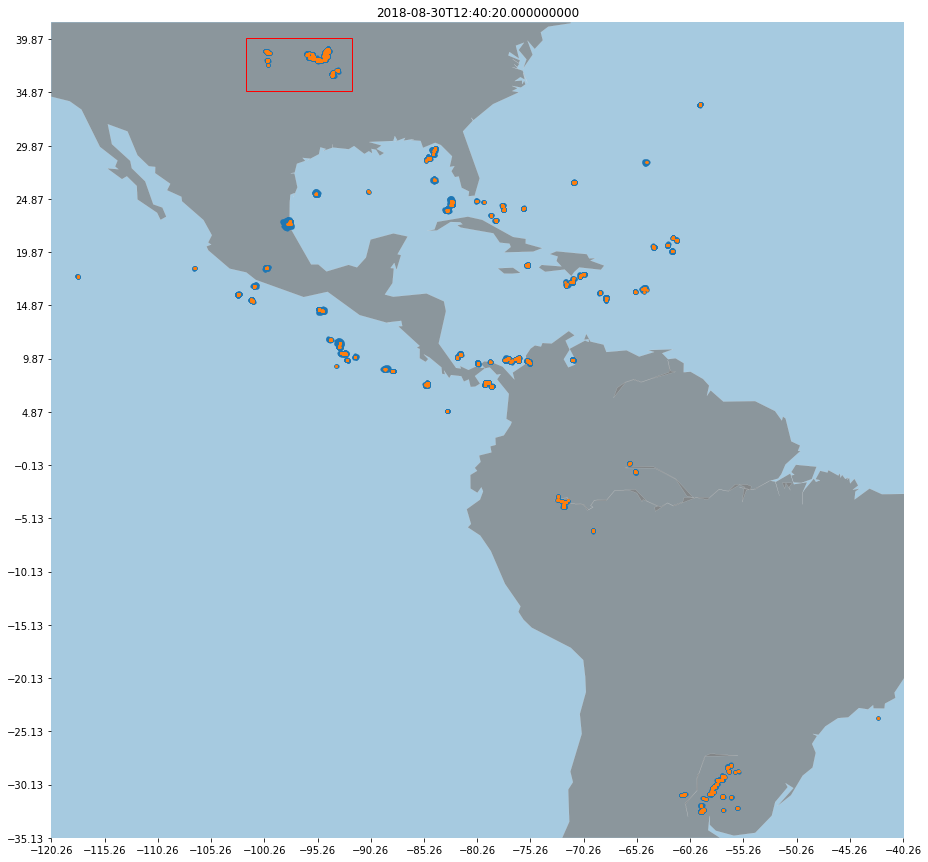

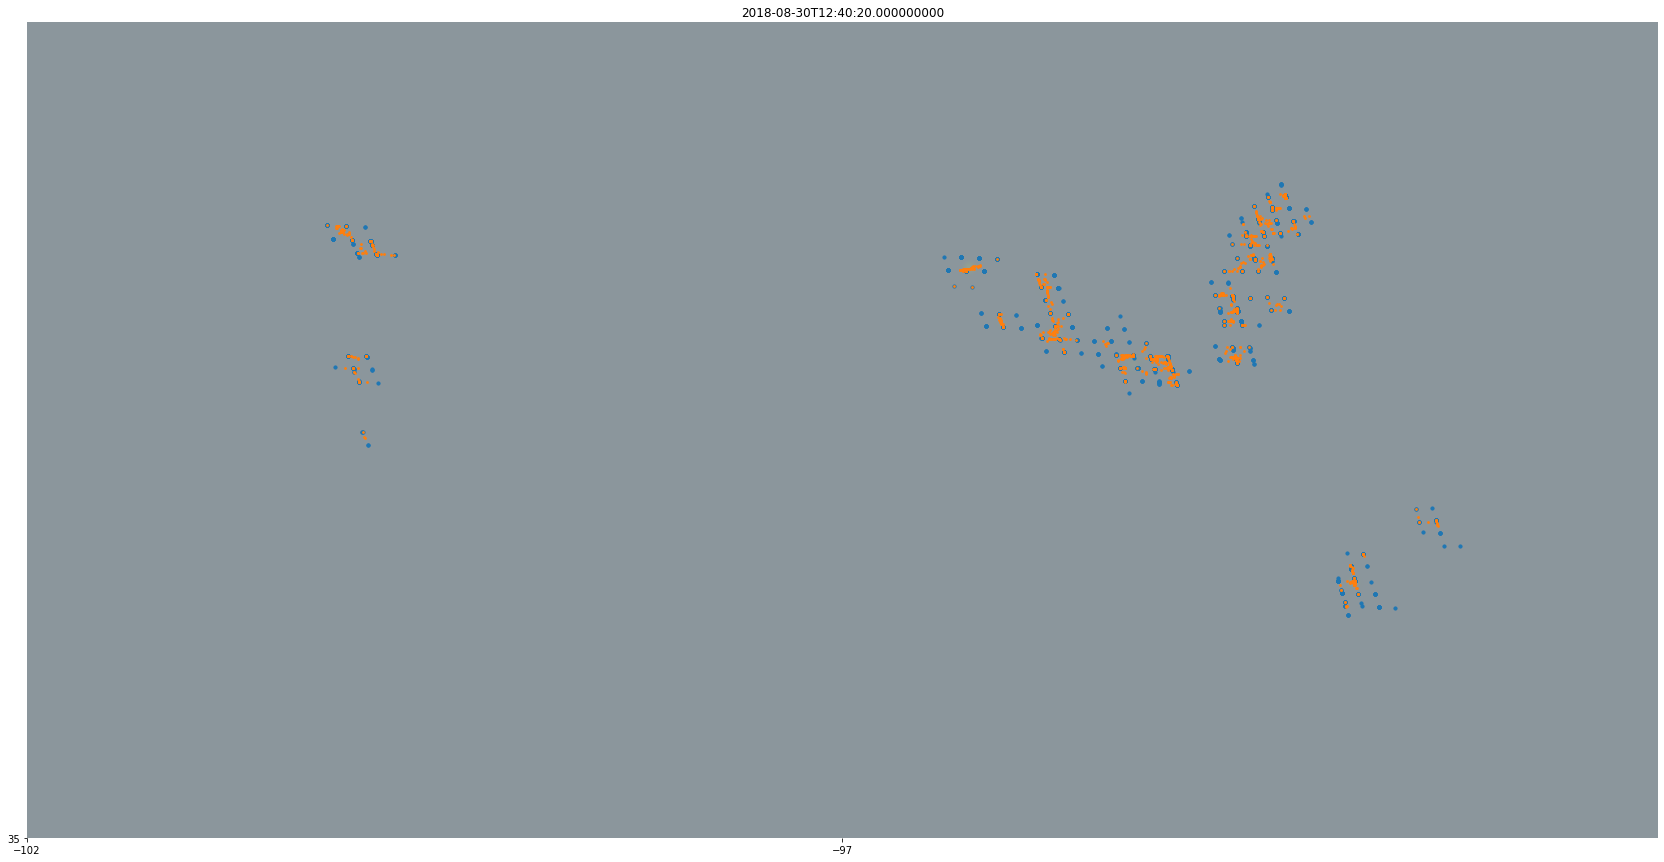

In [44]:
areaOfInterest = (-102,-92,40,35)
MakeBigGraph(glm.dataset,2.5,areaOfInterest)

In [45]:
start = pd.to_datetime(glm.dataset.attrs['time_coverage_start']).tz_localize(None)
end = pd.to_datetime(glm.dataset.attrs['time_coverage_end']).tz_localize(None)
small = df[(df['dt'] >= start) & (df['dt'] <= end) & (df['Longitude'] >= areaOfInterest[0]) & (df['Longitude'] <= areaOfInterest[1]) & (df['Latitude'] <= areaOfInterest[2]) & (df['Latitude'] >= areaOfInterest[3])]

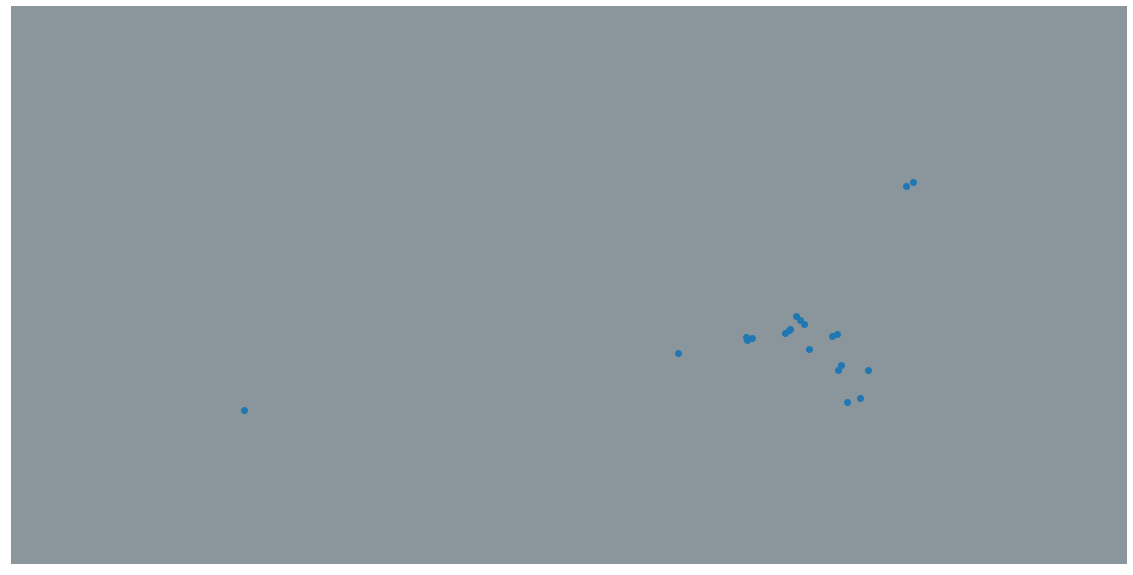

In [46]:
plt.figure(figsize=(20,20))
m = CreateMapBackground(edges=areaOfInterest)
m.scatter(small['Longitude'],small['Latitude'],zorder=4)
plt.show()